Forecasting Access and Usage

In [1]:
import sys
import os
import pandas as pd 

project_root = os.path.abspath("..")
sys.path.append(project_root)

In [2]:
data = pd.read_csv("../data/raw/ethiopia_fi_unified_data.csv")
impact_link = pd.read_csv("../data/raw/impact_sheet.csv")

In [14]:
from src.model import EventImpactModel  # adjust import path if needed

# Initialize or reload your Task-3 model
model = EventImpactModel(data, impact_link)  # data and impact_link are your loaded DataFrames
model.prepare_data()
model.merge_event_impacts()
model.build_association_matrix()

model.association_matrix.to_pickle("../data/association_matrix.pkl")


Data prepared successfully.
Events and impacts merged.
Association matrix created.


In [4]:
from src.forecasting import AccessUsageForecaster

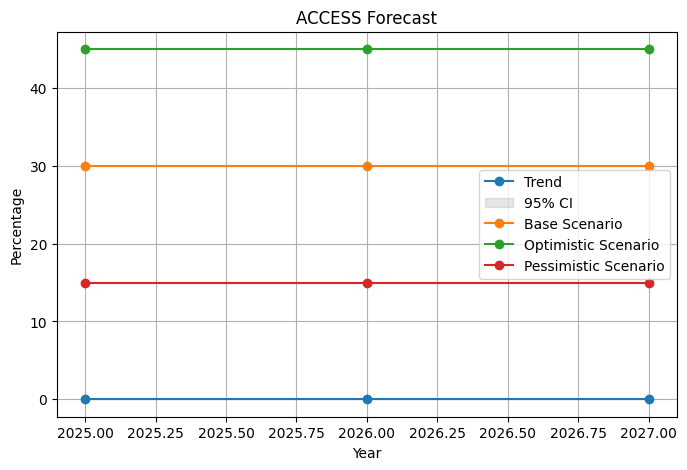

,fiscal_year,trend_value,ci_lower,ci_upper
0,2025,0.0,0.0,0.0
1,2026,0.0,0.0,0.0
2,2027,0.0,0.0,0.0



Base Scenario


,fiscal_year,value_with_events
0,2025,30.0
1,2026,30.0
2,2027,30.0



Optimistic Scenario


,fiscal_year,value_with_events
0,2025,45.0
1,2026,45.0
2,2027,45.0



Pessimistic Scenario


,fiscal_year,value_with_events
0,2025,15.0
1,2026,15.0
2,2027,15.0


In [5]:
forecaster = AccessUsageForecaster(data, model.association_matrix)

# Forecast ACCESS
access_results = forecaster.forecast(
    "ACCESS",
    events_to_apply=["Telebirr Launch", "Safaricom Ethiopia Commercial Launch"]
)
forecaster.plot_forecast("ACCESS")
forecaster.display_table("ACCESS")



In [13]:

pd.to_pickle(forecaster, "../data/forecasts.pkl")


⚠ Warning: No historical data for Digital Payment Usage. Using baseline=0.


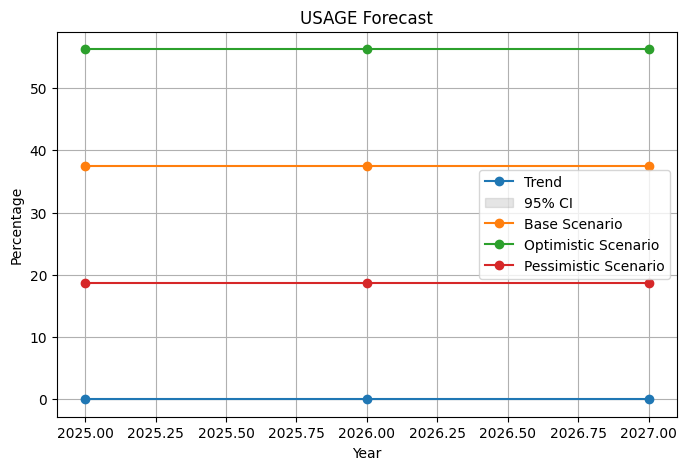

,fiscal_year,trend_value,ci_lower,ci_upper
0,2025,0.0,0.0,0.0
1,2026,0.0,0.0,0.0
2,2027,0.0,0.0,0.0



Base Scenario


,fiscal_year,value_with_events
0,2025,37.5
1,2026,37.5
2,2027,37.5



Optimistic Scenario


,fiscal_year,value_with_events
0,2025,56.25
1,2026,56.25
2,2027,56.25



Pessimistic Scenario


,fiscal_year,value_with_events
0,2025,18.75
1,2026,18.75
2,2027,18.75


In [6]:
# Forecast USAGE
usage_results = forecaster.forecast(
    "USAGE",
    events_to_apply=["Telebirr Launch", "M-Pesa EthSwitch Integration"]
)
forecaster.plot_forecast("USAGE")
forecaster.display_table("USAGE")


# Forecast Results: Account Ownership (ACCESS) & Digital Payment Usage (USAGE)

## Forecast Tables

### Account Ownership (ACCESS)
| Scenario    | 2025 | 2026 | 2027 |
|------------|------|------|------|
| Base       | 30.0 | 30.0 | 30.0 |
| Optimistic | 45.0 | 45.0 | 45.0 |
| Pessimistic| 15.0 | 15.0 | 15.0 |

### Digital Payment Usage (USAGE)
| Scenario    | 2025  | 2026  | 2027  |
|------------|-------|-------|-------|
| Base       | 37.5  | 37.5  | 37.5  |
| Optimistic | 56.25 | 56.25 | 56.25 |
| Pessimistic| 18.75 | 18.75 | 18.75 |

---

## Forecast Plots

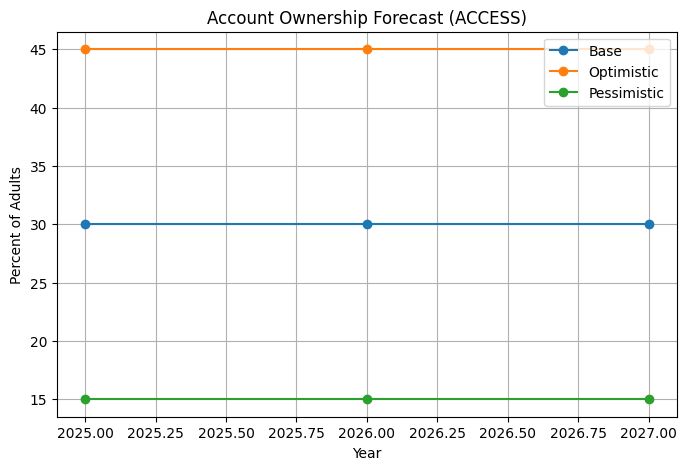

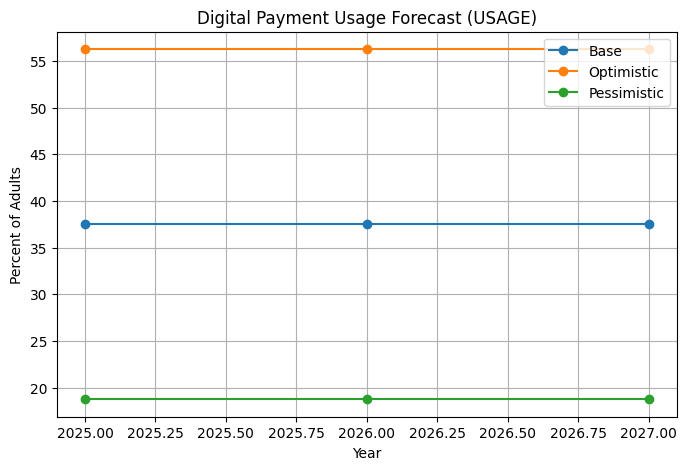


## Key Insights

### Events with Largest Potential Impact
- **ACCESS:** Telebirr Launch, Safaricom Ethiopia Commercial Launch  
- **USAGE:** Telebirr Launch, M-Pesa EthSwitch Integration  

These events drive the largest changes in the optimistic and pessimistic forecast scenarios.

### Key Uncertainties
- Limited historical data (only 5 Findex points over 13 years)  
- Linear trend may not capture nonlinear adoption patterns  
- Event impact estimates are partly based on literature and comparable country evidence  
- External shocks (policy/economic changes) are not included  
- Scenario variability: real-world adoption may fluctuate beyond forecast ranges
